In [2]:
import seaborn as sns
sns.set_style('whitegrid')

In [1]:
import preprocess as p

In [3]:
df = p.get_augmented_dataset(verbose=True)

Found the dataset in CheXpert-v1.0-small
Adding patient ID
Adding study number
Adding view number
Adding age group
Adding train/test


In [4]:
p.fix_dataset(df)

In [5]:
df.head(3)

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Patient ID,Study Number,View Number,Age Group,Train/Test
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1,0,0,0,0,...,0,0,0,0,1,1,1,1,(65-79) Aged,Train
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0,0,-1,1,0,...,0,-1,0,1,0,2,2,1,(80+) Aged 80,Train
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0,0,0,1,0,...,0,0,0,1,0,2,1,1,(80+) Aged 80,Train


<AxesSubplot:xlabel='Sex', ylabel='Age'>

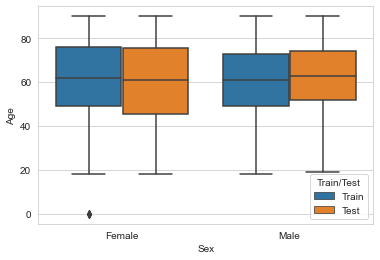

In [10]:
sns.boxplot(data=df, x='Sex', y='Age', hue='Train/Test')

<AxesSubplot:xlabel='Age Group', ylabel='count'>

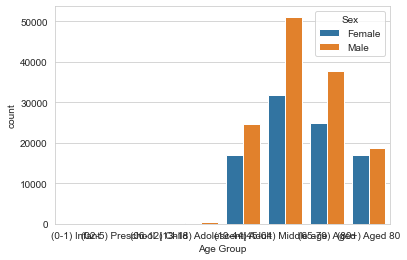

In [13]:
sns.countplot(data=df, x=p.COL_AGE_GROUP, hue='Sex')